<a href="https://colab.research.google.com/github/aadigedhar/Arduino-baise/blob/master/black_(male_and_female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
folder = 'black_male'
file = 'black_male.txt'

In [0]:
folder = 'black_female'
file = 'black_female.txt'

In [0]:
path = Path('data/male_female')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
path.ls()

[PosixPath('data/male_female/black_male'),
 PosixPath('data/male_female/black_female')]

In [0]:
classes = ['black_male','black_female']

In [14]:
download_images(path/file, dest, max_pics=250)

Error https://negromanosphere.com/wp-content/uploads/2017/02/black-men-doctor.jpg HTTPSConnectionPool(host='negromanosphere.com', port=443): Read timed out. (read timeout=4)
Error https://www.maozzz.com/wp-content/uploads/2018/09/delectable-best-short-haircut-styles-for-men-hairstyles-medium-bob-black-hair-south-africa-wedding-school-new.jpg HTTPSConnectionPool(host='www.maozzz.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/09/delectable-best-short-haircut-styles-for-men-hairstyles-medium-bob-black-hair-south-africa-wedding-school-new.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f20cca2d7b8>, 'Connection to www.maozzz.com timed out. (connect timeout=4)'))
Error https://img.washingtonpost.com/rf/image_1484w/2010-2019/WashingtonPost/2016/01/31/Others/Images/2016-01-31/Farmworker_killings031454257266.jpg?uuid=pzQIGMg2EeW5qyZZEQS7GQ HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read ti

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

black_male


cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000057.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000045.png'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000242.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000016.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000024.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000144.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_male/00000164.jpg'>
black_female


cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000131.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000211.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000067.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000215.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000241.png'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000033.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000100.jpg'>
cannot identify image file <_io.BufferedReader name='data/male_female/black_female/00000126.jpg'>
cannot identify imag

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['black_female', 'black_male']

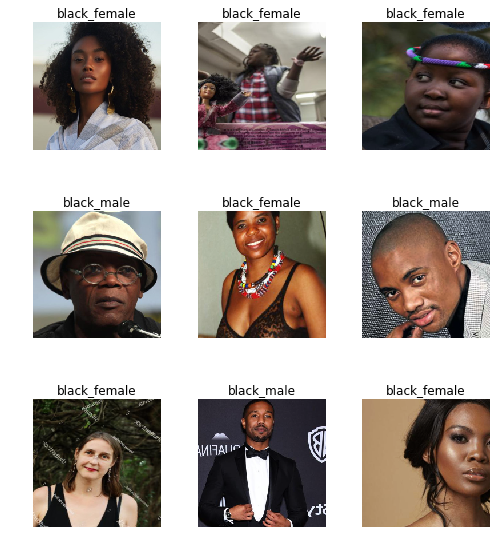

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black_female', 'black_male'], 2, 353, 88)

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 118222550.41it/s]


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.838158,0.620812,0.318182,00:06
1,0.600335,0.433059,0.193182,00:05
2,0.499125,0.397128,0.181818,00:06
3,0.443755,0.383960,0.159091,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


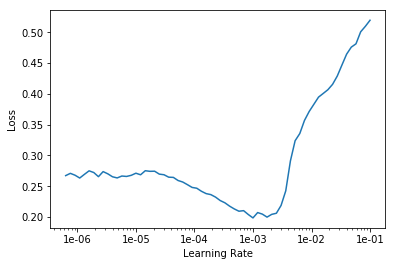

In [25]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.139465,0.409053,0.125000,00:05
1,0.138242,0.438604,0.159091,00:05
2,0.129432,0.425846,0.159091,00:06


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

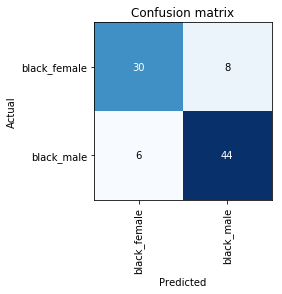

In [31]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

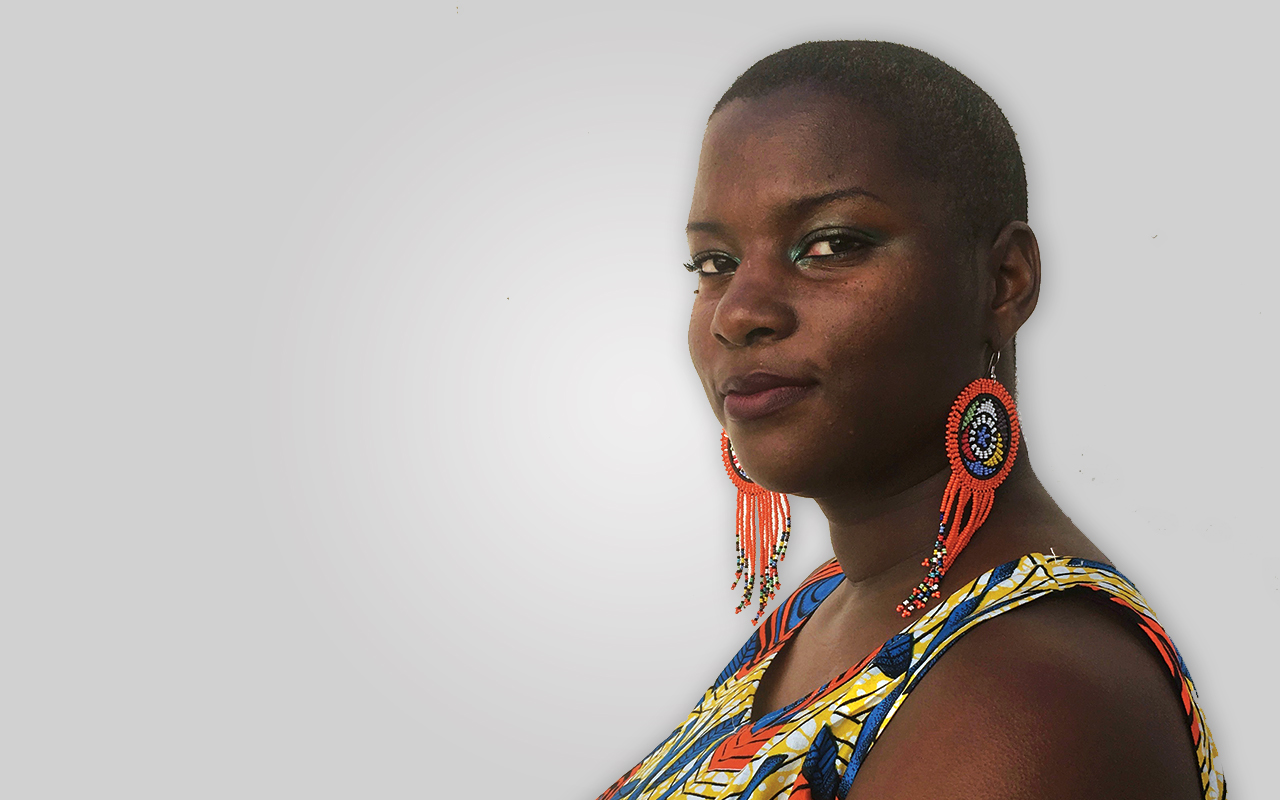

In [33]:
img = open_image('data/download.jpg')
img

In [0]:
learn = load_learner(path)

In [35]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category black_male

In [36]:
!wget https://github.com/fastai/course-v3/raw/master/docs/production/google-app-engine.zip

--2019-04-19 17:30:20--  https://github.com/fastai/course-v3/raw/master/docs/production/google-app-engine.zip
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fastai/course-v3/master/docs/production/google-app-engine.zip [following]
--2019-04-19 17:30:20--  https://raw.githubusercontent.com/fastai/course-v3/master/docs/production/google-app-engine.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11147 (11K) [application/zip]
Saving to: ‘google-app-engine.zip’

google-app-engine.z 100%[===================>]  10.89K  --.-KB/s    in 0s      

2019-04-19 17:30:21 (143 MB/s) - ‘googl

In [37]:
!unzip google-app-engine.zip

Archive:  google-app-engine.zip
   creating: google-app-engine/
 extracting: google-app-engine/app.yaml  
   creating: __MACOSX/
   creating: __MACOSX/google-app-engine/
  inflating: __MACOSX/google-app-engine/._app.yaml  
   creating: google-app-engine/app/
  inflating: google-app-engine/app/server.py  
   creating: __MACOSX/google-app-engine/app/
  inflating: __MACOSX/google-app-engine/app/._server.py  
   creating: google-app-engine/app/models/
  inflating: google-app-engine/app/models/models.md  
   creating: __MACOSX/google-app-engine/app/models/
  inflating: __MACOSX/google-app-engine/app/models/._models.md  
  inflating: __MACOSX/google-app-engine/app/._models  
   creating: google-app-engine/app/static/
  inflating: google-app-engine/app/static/client.js  
   creating: __MACOSX/google-app-engine/app/static/
  inflating: __MACOSX/google-app-engine/app/static/._client.js  
  inflating: google-app-engine/app/static/style.css  
  inflating: __MACOSX/google-app-engine/app/static/._s

In [38]:
cd google-app-engine/app

/content/google-app-engine/app
